In [1]:
import nibabel as nib
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import glob

In [2]:
## Utils
def load_json_file(filepath):
    with open(filepath, 'r') as file:
        data = json.load(file)
    return data


def filter_file_paths_from_json(jsonData, filterString='0001'):
    filteredData = []
    for i in range(len(jsonData['training_paired_images'])):
        tmproot, tmpext = os.path.splitext(jsonData['training_paired_images'][i]['moving'])
        root, ext = os.path.splitext(tmproot)
        splitRoot = root.split('_')
        if splitRoot[-1] == filterString:
            filteredData.append(jsonData['training_paired_images'][i])

    return filteredData


def load_data_from_filtered_paths(paths, dataFolderPath):
    fixedData = []
    movingData = []
    for image in paths:
        fixedImg = nib.load(dataFolderPath + image['fixed']).get_fdata()
        fixedData.append(fixedImg)
        movingImg = nib.load(dataFolderPath + image['moving']).get_fdata()
        movingData.append(movingImg)

    return fixedData, movingData



In [3]:
dataFolder = './data/ReMIND2Reg'
jsonPath = dataFolder + '/ReMIND2Reg_dataset.json'

In [4]:
jsonData = load_json_file(jsonPath)

In [5]:
filteredData = filter_file_paths_from_json(jsonData, '0001')
filteredData

[{'fixed': './imagesTr/ReMIND2Reg_0000_0000.nii.gz',
  'moving': './imagesTr/ReMIND2Reg_0000_0001.nii.gz'},
 {'fixed': './imagesTr/ReMIND2Reg_0001_0000.nii.gz',
  'moving': './imagesTr/ReMIND2Reg_0001_0001.nii.gz'},
 {'fixed': './imagesTr/ReMIND2Reg_0002_0000.nii.gz',
  'moving': './imagesTr/ReMIND2Reg_0002_0001.nii.gz'},
 {'fixed': './imagesTr/ReMIND2Reg_0003_0000.nii.gz',
  'moving': './imagesTr/ReMIND2Reg_0003_0001.nii.gz'},
 {'fixed': './imagesTr/ReMIND2Reg_0004_0000.nii.gz',
  'moving': './imagesTr/ReMIND2Reg_0004_0001.nii.gz'},
 {'fixed': './imagesTr/ReMIND2Reg_0005_0000.nii.gz',
  'moving': './imagesTr/ReMIND2Reg_0005_0001.nii.gz'},
 {'fixed': './imagesTr/ReMIND2Reg_0006_0000.nii.gz',
  'moving': './imagesTr/ReMIND2Reg_0006_0001.nii.gz'},
 {'fixed': './imagesTr/ReMIND2Reg_0008_0000.nii.gz',
  'moving': './imagesTr/ReMIND2Reg_0008_0001.nii.gz'},
 {'fixed': './imagesTr/ReMIND2Reg_0009_0000.nii.gz',
  'moving': './imagesTr/ReMIND2Reg_0009_0001.nii.gz'},
 {'fixed': './imagesTr/ReMIN

In [6]:
fixedData, movingData = load_data_from_filtered_paths(filteredData, dataFolder)

print(len(fixedData))
print(len(movingData))

93
93


In [14]:
fixedData[0].shape

(256, 256, 256)

In [12]:
image = 5
slice = 128

(np.float64(-0.5), np.float64(255.5), np.float64(255.5), np.float64(-0.5))

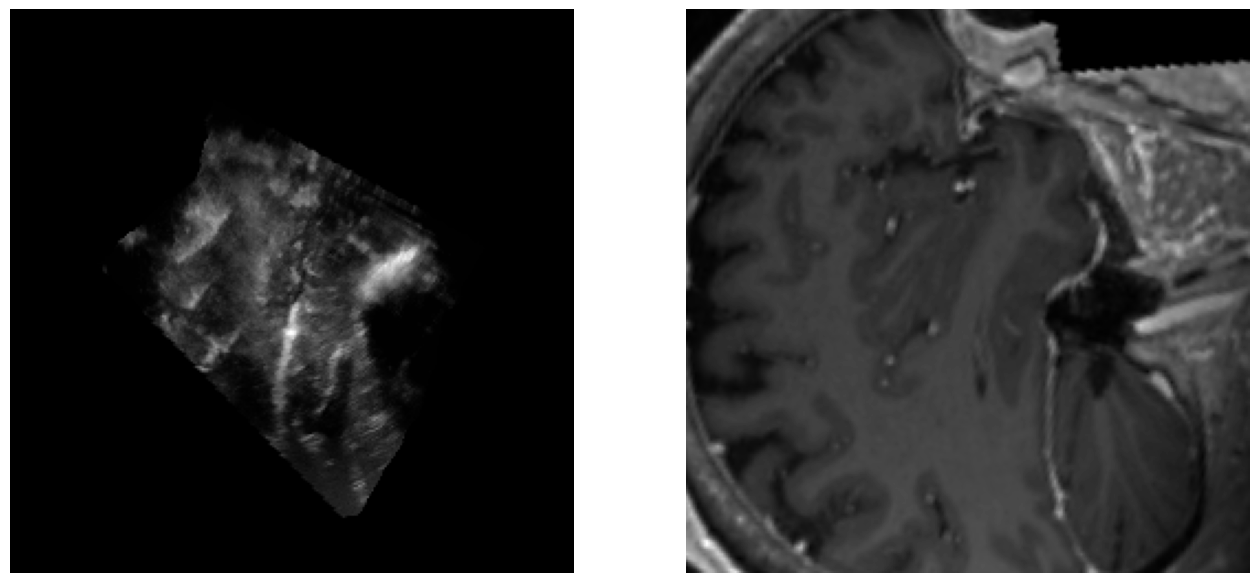

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 8))
axes[0].imshow(fixedData[image][slice], cmap="gray")
axes[0].axis("off")
axes[1].imshow(movingData[image][slice], cmap="gray")
axes[1].axis("off")

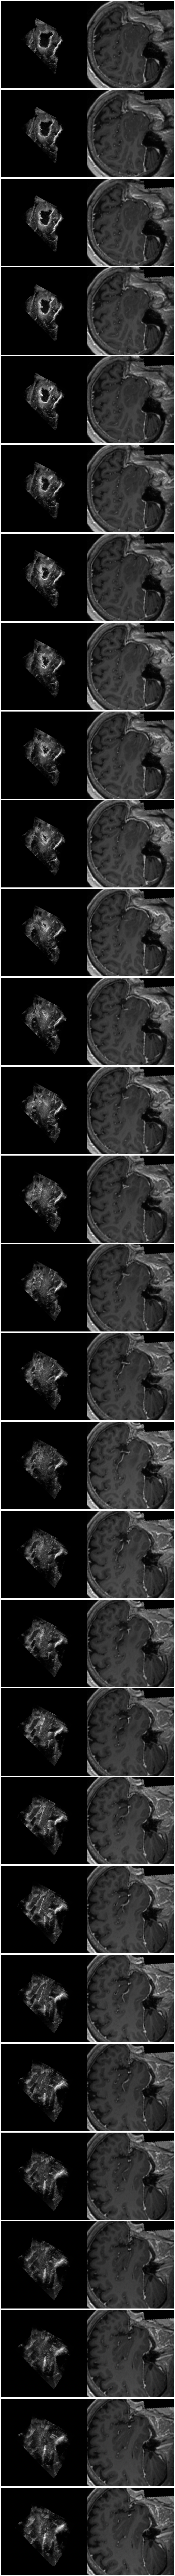

In [24]:
indeces = np.arange(100,129, 1)
fig, axes = plt.subplots(nrows=len(indeces), ncols=2, figsize=(16, 8 * len(indeces)))


for idx, i in enumerate(indeces):
    axes[idx, 0].imshow(fixedData[image][i], cmap="gray")
    axes[idx, 0].axis("off")
    axes[idx, 1].imshow(movingData[image][i], cmap="gray")
    axes[idx, 1].axis("off")

plt.tight_layout()
plt.show()